### What is the general form of linear regression? What is the vector form?

A linear regression model makes a prediction by simply computing a **weighted
sum** of the input features, plus a **constant** called the **bias** term
(also called the intercept term).
<h5> General Form: $ \hat y = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + ... + \theta_{n}x_{n} $ </h5>

<h5> Vector Form: $ \hat y = h_{\theta}(x) = \theta.x $ </h5>

- θ is the model’s parameter vector
- **x** is the instance’s feature vector, x<sub>0</sub> = 1
- θ · **x** is the **dot product** of the vectors θ and **x**
- hθ is the hypothesis function, using the model parameters θ


### The purpose of cost function, Mean Square Error (MSE), and  the normal equation that minimizes the cost function MSE(θ).

- ***Cost Function***: The cost function measures the discrepancy between predicted and actual values in linear regression. Minimizing this function by adjusting model parameters results in the best-fit line that accurately represents the data.
<br></br>
- **Mean Squared Error (MSE)** is a cost function, commonly used in linear regression, that calculates the **average squared difference** between the predicted values and the actual values. <br><center> 
$ MSE(X, h_{\theta}) = \frac 1 m \sum \limits _{i=1} ^m (\theta ^T x^{(i)} - y^{(i)})^2 $ </center></br>

- **Normal Equation:** The normal equation is a mathematical formula used to directly find the optimal parameters (coefficients) that minimize the MSE in a linear regression problem.
<br><center> $\hat\theta = (X^TX)^{-1}X^Ty $ </center></br>

The normal equation is actually **Least Square analysis** from linear algebra.

### Differences between Batch gradient descent, Stochastic gradient descent, and Mini-batch gradient descent.

**Batch Gradient Descent:**

- **Full Data:** Uses the entire dataset for each parameter update.
- **Updates:** Updates model once per iteration.
- **Pros:** Accurate convergence to global minimum.
- **Cons:** Slow for large data, memory-intensive.

**Stochastic Gradient Descent (SGD):**

- **Individual Data:** Uses one data point for each parameter update.
- **Updates:** Frequent updates, every data point.
- **Pros:** Fast convergence, escapes local minima.
- **Cons:** Noisy trajectory, may not converge exactly.

**Mini-Batch Gradient Descent:**

- **Small Batches:** Uses small groups of data points (mini-batches) for updates.
- **Updates:** Updates after each mini-batch.
- **Pros:** Balanced efficiency, works for various data sizes.
- **Cons:** Batch size tuning, some variance in updates.

Each method has trade-offs between accuracy, speed, and memory use. Choose based on data size and convergence needs.







### Importing necessary libraries

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

### Creating Pandas DataFrame

In [3]:
df_sim = pd.DataFrame({
    'kilometres': [1, 2, 3, 4, 5],
    'Meter': [7.5, 10, 12.5, 15, 17.5],
    'Paid (incl. tips)': [8, 10, 14, 15, 20],
})

df_sim

,kilometres,Meter,Paid (incl. tips)
0,1,7.5,8
1,2,10.0,10
2,3,12.5,14
3,4,15.0,15
4,5,17.5,20


### Setting a column as index

We can use `df.set_index()` function to choose any of the existing column or columns as index for our dataFrame. 
First we choose the column, then we select pass the name of the columns that we want to select as a list.

Set the parameter `inplace=True`, to modify the original dataFrame

In [4]:
df_sim.set_index('kilometres')[['Meter']]

,Meter
kilometres,
1,7.5
2,10.0
3,12.5
4,15.0
5,17.5


In [5]:
df_sim.set_index('kilometres')[['Meter', 'Paid (incl. tips)']]


,Meter,Paid (incl. tips)
kilometres,,
1,7.5,8
2,10.0,10
3,12.5,14
4,15.0,15
5,17.5,20


### Creating plots

`fig` is the whole plot object, and `axs` is the list of `subplots`. The first two parameters `1, 2` represents `row, col` number. `sharex, sharey` parameters allows to share same limits for respective axis.

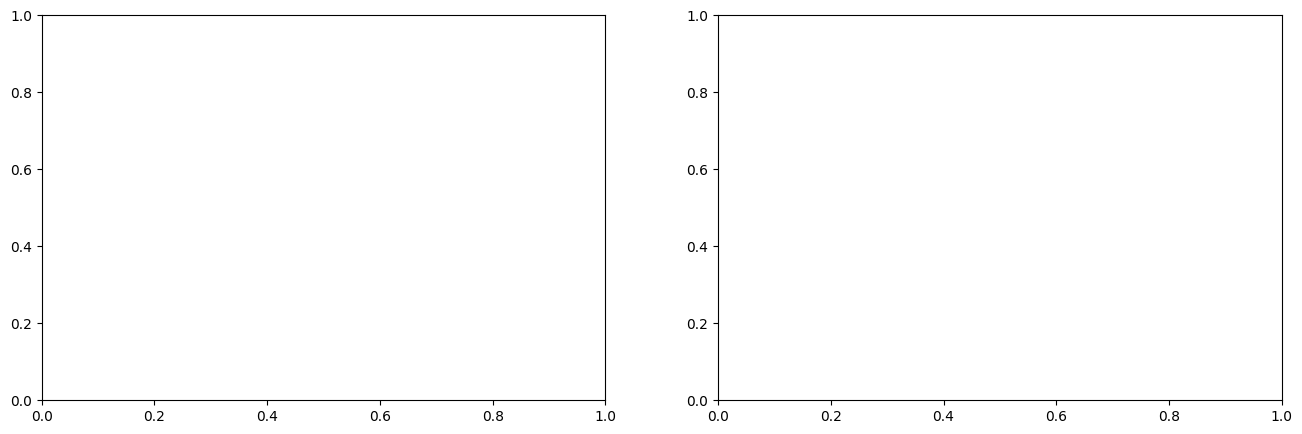

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5), sharex=False, sharey=False)

### Parameters for subplots
`kind` - what type of plot <br>
`zorder` - in case of any intersection, higher value line will be on top <br>
`alpha` - Transparency

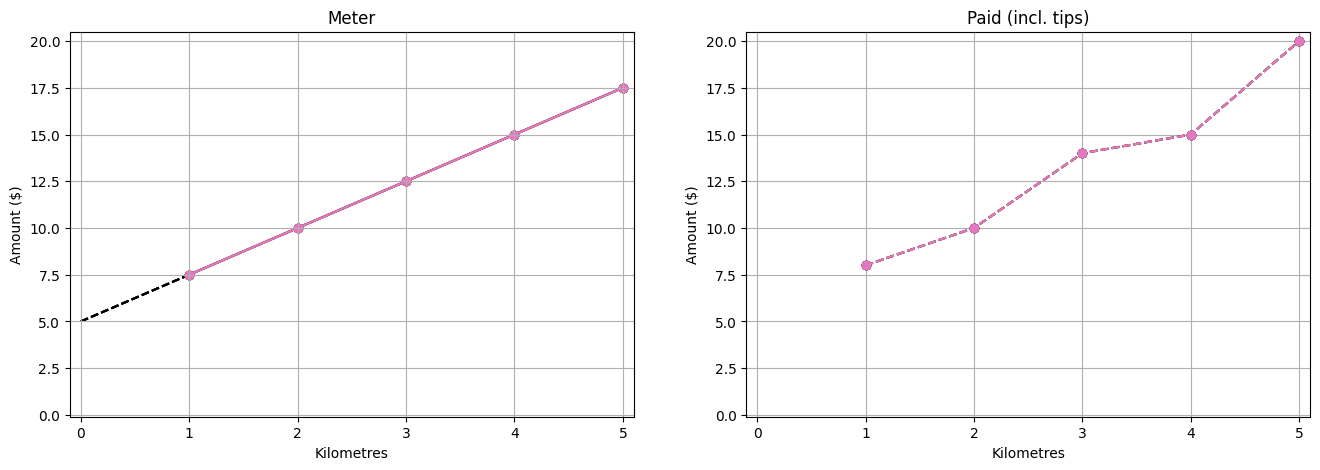

In [26]:
df_sim.set_index('kilometres')['Meter'].plot(title='Meter', kind='line', marker='o', zorder=1, ax=axs[0], grid=True)
df_sim.set_index('kilometres')['Paid (incl. tips)'].plot(title='Paid (incl. tips)', kind='line', marker='o', linestyle='--', ax=axs[1], grid=True)

axs[0].set_xlabel('Kilometres')
axs[1].set_xlabel('Kilometres')

axs[0].set_ylabel('Amount ($)')
axs[1].set_ylabel('Amount ($)')

axs[0].set_xlim((-0.1,5.1))
axs[0].set_ylim((-0.1,20.5))

axs[1].set_xlim((-0.1,5.1))
axs[1].set_ylim((-0.1,20.5))

axs[0].plot([0,1], [5,7.5], linestyle='--', color='k', zorder=0, alpha=0.6)

fig

#### Understandign `zorder` parameter
Higherst `zorder` is on top incase of intersection

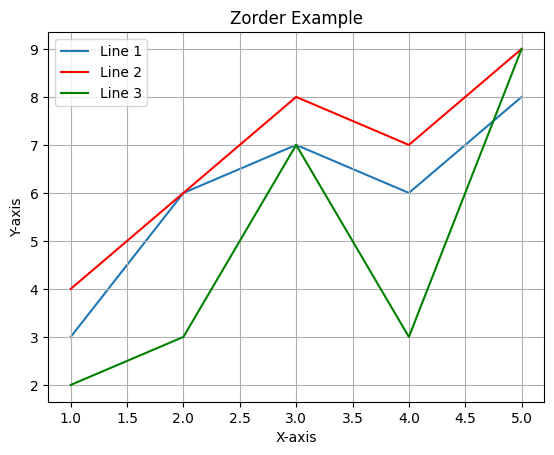

In [29]:
x = [1, 2, 3, 4, 5]
y1 = [3, 6, 7, 6, 8]
y2 = [4, 6, 8, 7, 9]
y3 = [2, 3, 7, 3, 9]

plt.plot(x, y1, label='Line 1', zorder=1)  # Line 1 with higher zorder
plt.plot(x, y2, color='red', label='Line 2', zorder=2)  # Markers with even higher zorder
plt.plot(x, y3, color='green', label='Line 3', zorder=3)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Zorder Example')
plt.grid(True)
plt.legend()
plt.show()


## Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
df_taxi = df_sim
df_taxi

,kilometres,Meter,Paid (incl. tips)
0,1,7.5,8
1,2,10.0,10
2,3,12.5,14
3,4,15.0,15
4,5,17.5,20


In [35]:
reg = LinearRegression() #initializing

In [39]:
x = df_taxi[['kilometres']]
y = df_taxi[['Paid (incl. tips)']]

In [40]:
reg.fit(x, y)

LinearRegression()

In [41]:
df_taxi['Paid (Predicted)'] = reg.predict(df_taxi[['kilometres']])
df_taxi

,kilometres,Meter,Paid (incl. tips),Paid (Predicted)
0,1,7.5,8,7.6
1,2,10.0,10,10.5
2,3,12.5,14,13.4
3,4,15.0,15,16.3
4,5,17.5,20,19.2


In [50]:
print(f"Amount Paid = {reg.intercept_.item():.1f} + {reg.coef_[0].item():.1f} * Distance")


Amount Paid = 4.7 + 2.9 * Distance


In [51]:
print("Amount Paid = {:.1f} + {:.1f} * Distance".format(
    reg.intercept_.item(), reg.coef_[0].item()))


Amount Paid = 4.7 + 2.9 * Distance


<Axes: xlabel='kilometres', ylabel='Paid (incl. tips)'>

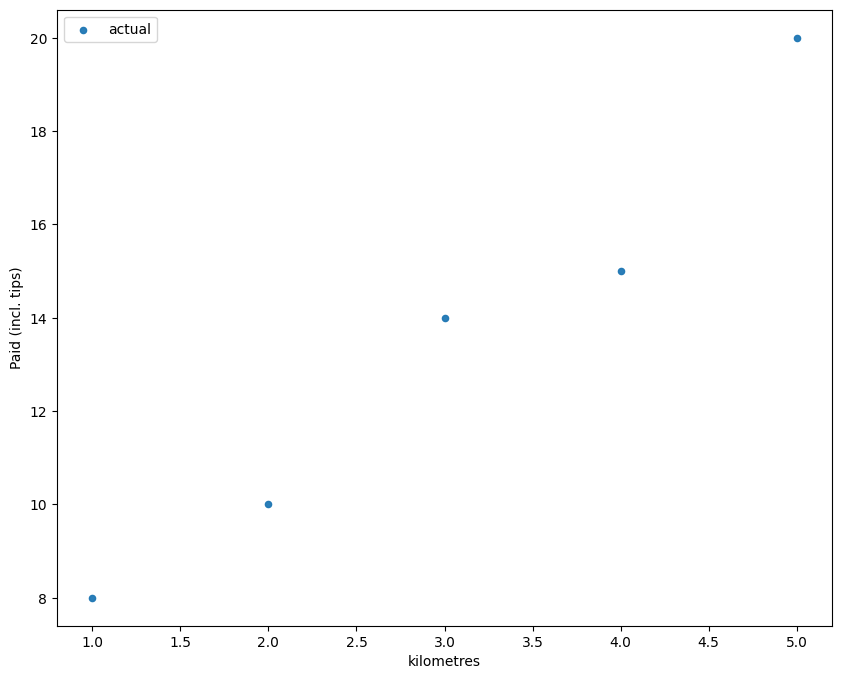

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8), sharex=False, sharey=False)
df_taxi.tail(5).plot(label='actual', kind='scatter', x='kilometres', y='Paid (incl. tips)',
marker='o', alpha=0.95, ax=ax)

In [55]:
x_min, x_max = 0.8, 5.2
y_min, y_max = 5, 22

In [56]:
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

(5.0, 22.0)

### Normalizing values

`normalized_value = (value - min_value) / (max_value - min_value)` 
The formula essentially scales the values to the range `[0, 1]`, where 0 corresponds to the minimum value and 1 corresponds to the maximum value.

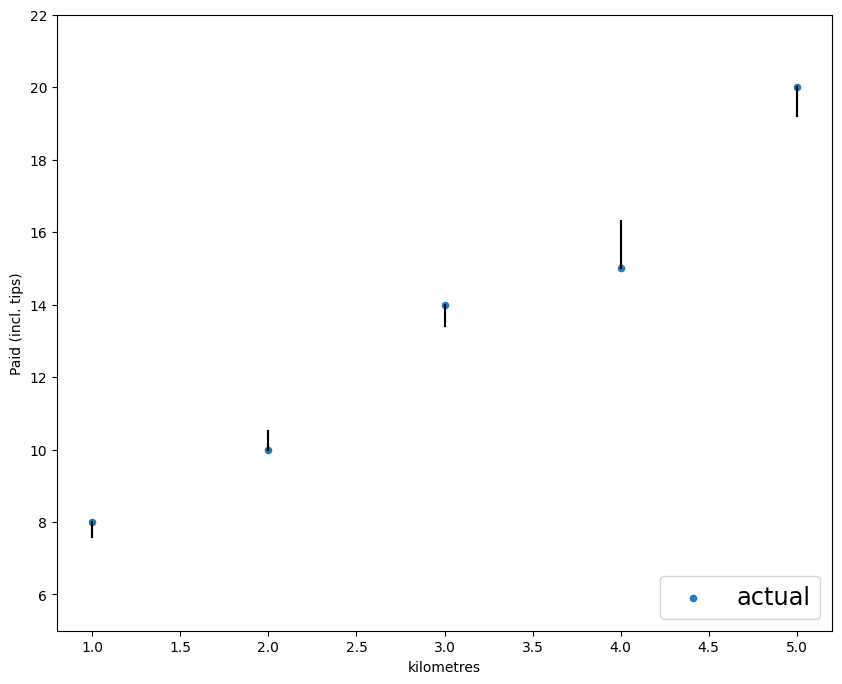

In [58]:
for x, y1, y2 in df_taxi.tail(5)[['kilometres', 'Paid (incl. tips)', 'Paid (Predicted)']].values.tolist():
    ymin, ymax = min(y1, y2), max(y1, y2)
    ymin, ymax = (ymin-y_min)/(y_max-y_min), (ymax-y_min)/(y_max-y_min)
    ax.axvline(x=x, ymin=ymin, ymax=ymax, color='k')

ax.legend(loc='lower right', fontsize='xx-large')
fig

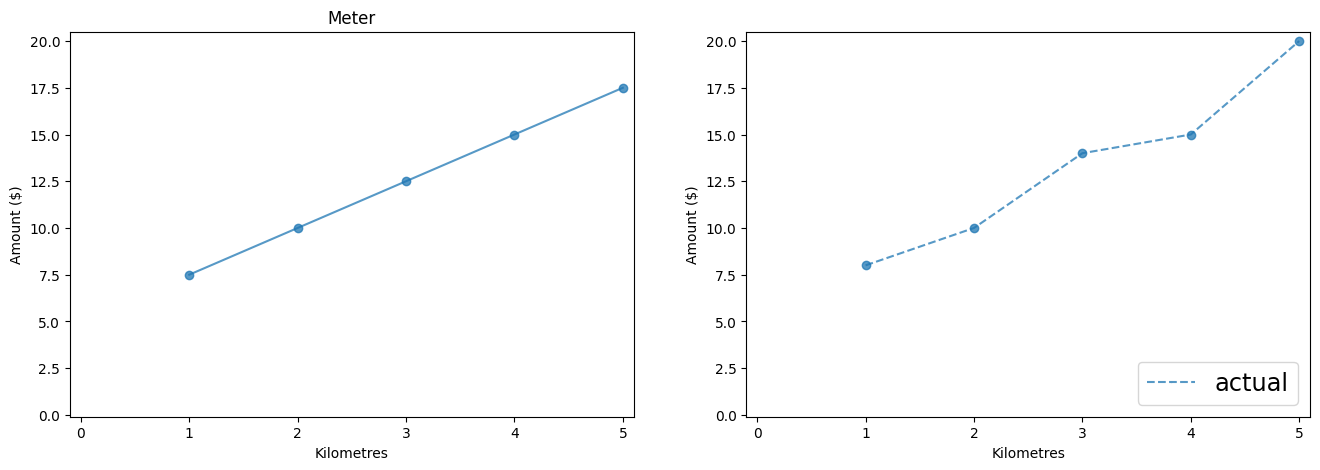

In [61]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5), sharex=False, sharey=False)

df_taxi.set_index('kilometres')['Meter'].plot(
    title='Meter', kind='line', marker='o',
    alpha=0.75, ax=axs[0])

df_taxi.set_index('kilometres')['Paid (incl. tips)'].plot(
    label='actual', kind='line', marker='o', linestyle='--',
    alpha=0.75, ax=axs[1])

axs[0].set_xlabel('Kilometres')
axs[1].set_xlabel('Kilometres')

axs[0].set_ylabel('Amount ($)')
axs[1].set_ylabel('Amount ($)')

axs[0].set_xlim((-0.1, 5.1))
axs[1].set_xlim((-0.1, 5.1))

axs[0].set_ylim((-0.1, 20.5))
axs[1].set_ylim((-0.1, 20.5))

axs[1].legend(markerscale=0.01, loc='lower right', fontsize='xx-large')

In [62]:
df_taxi

,kilometres,Meter,Paid (incl. tips),Paid (Predicted)
0,1,7.5,8,7.6
1,2,10.0,10,10.5
2,3,12.5,14,13.4
3,4,15.0,15,16.3
4,5,17.5,20,19.2
